In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
housing = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'))
housing.head()

m = len(housing)
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(v1):
    return v1.map({'yes': 1, 'no': 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [48]:
housing = housing.drop(labels='furnishingstatus', axis=1)
housing.head()
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.8, test_size=0.2)
df_train.shape

(436, 12)

In [50]:
num_vars_b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
           'airconditioning', 'parking', 'prefarea']
df_Newtrain_b = df_train[num_vars_b]
df_Newtest_b = df_test[num_vars_b]
df_Newtrain_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [52]:
y_train_b = df_Newtrain_b.values[:, 0]
X_train_b = df_Newtrain_b.values[:, 1:13]
y_test_b = df_Newtest_b.values[:, 0]
X_test_b = df_Newtest_b.values[:, 1:13]
# Lets create a matrix with single column of ones 
X_01 = np.ones((436, 1)) 
X_02 = np.ones((109, 1)) 

In [54]:
X_N1_b = X_train_b.reshape(436, 11) 
X_N2_b = X_test_b.reshape(109, 11)
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 
theta = np.zeros(12) 
theta
y_train_b.shape

(436,)

In [56]:

# Cell 8
def compute_cost(X, y, theta, m): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J

# Cell 9
def gradient_descent(X, X2, y, y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 
    m = len(y)
    m2 = len(y2)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta, m)   
        cost_history2[i] = compute_cost(X2, y2, theta, m2)
    return theta, cost_history, cost_history2

# Cell 10
iterations = 10000
alpha = 0.000000001
theta, cost_history_b, cost_history2_b = gradient_descent(X_train_b, X_test_b, y_train_b, y_test_b, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_b[-1], cost_history2_b[-1])

Final value of theta = [3.56167597e+00 8.61023521e+02 1.37751102e+01 7.69640388e+00
 1.18613651e+01 3.23099925e+00 1.62924400e+00 2.66474429e+00
 7.07634884e-01 3.12197913e+00 3.44366068e+00 1.66228177e+00]
cost_history = 1704571753829.9995 1550617422642.9753


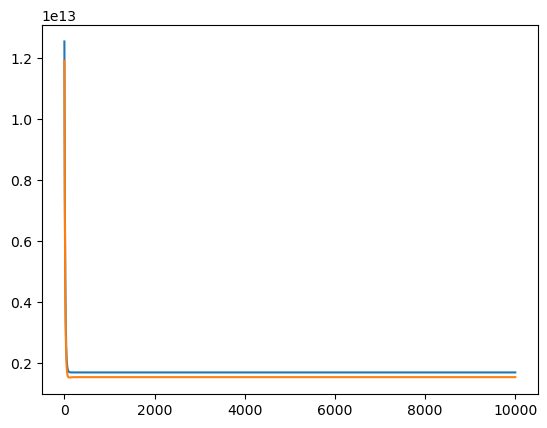

In [58]:
plt.plot(cost_history_b, label='line 1')
plt.plot(cost_history2_b, label='line 2')

In [60]:
housing = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'))
housing.head()
m = len(housing)
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(v1):
    return v1.map({'yes': 1, 'no': 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [62]:
m = len(housing)
housing = housing.drop(labels='furnishingstatus', axis=1)
housing.head()
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.8, test_size=0.2)
df_train.shape

(436, 12)

In [64]:
num_vars_b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
           'airconditioning', 'parking', 'prefarea']
df_Newtrain_b = df_train[num_vars_b]
df_Newtest_b = df_test[num_vars_b]
df_Newtrain_b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [66]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain_b[num_vars_b] = scaler.fit_transform(df_Newtrain_b[num_vars_b])
df_Newtest_b[num_vars_b] = scaler.fit_transform(df_Newtest_b[num_vars_b])
df_Newtrain_b.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.000000,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.081818,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.096970,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.072727,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.239394,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
y_train_b = df_Newtrain_b.values[:, 0]
X_train_b = df_Newtrain_b.values[:, 1:13]
y_test_b = df_Newtest_b.values[:, 0]
X_test_b = df_Newtest_b.values[:, 1:13]
# Lets create a matrix with single column of ones 
X_01 = np.ones((436, 1)) 
X_02 = np.ones((109, 1)) 
# Using reshape function convert X 1D array to 2D array of dimension 97x1 
X_N1_b = X_train_b.reshape(436, 11) 
X_N2_b = X_test_b.reshape(109, 11)
X_train_b = np.hstack((X_01, X_N1_b)) 
X_test_b = np.hstack((X_02, X_N2_b)) 
theta = np.zeros(12) 
theta
y_train_b.shape

(436,)

In [70]:
def compute_cost(X, y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J

def gradient_descent(X, X2, y, y2, theta, alpha, iterations):
    cost_history = np.zeros(iterations) 
    cost_history2 = np.zeros(iterations) 
    lmbda_value = 0.6
    
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, y) 
        sum_delta = (alpha / m) * (X.transpose().dot(errors) + lmbda_value * theta); 
        theta = theta - sum_delta; 
        cost_history[i] = compute_cost(X, y, theta)   
        cost_history2[i] = compute_cost(X2, y2, theta)
    return theta, cost_history, cost_history2

In [72]:
iterations = 9000
alpha = 0.01
theta, cost_history_b, cost_history2_b = gradient_descent(X_train_b, X_test_b, y_train_b, y_test_b, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_b[-1], cost_history2_b[-1])

Final value of theta = [0.00723967 0.22242429 0.06864165 0.17673411 0.11004207 0.0466215
 0.04186627 0.02713731 0.09526308 0.08100394 0.07899188 0.06862949]
cost_history = 0.003651398322065597 0.0008887887287341694


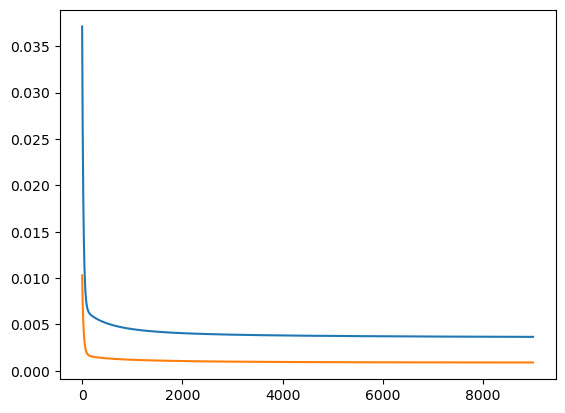

In [78]:
plt.plot(cost_history_b, label='line 1')
plt.plot(cost_history2_b, label='line 2')

In [80]:
housing = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'))
housing.head()
m = len(housing)
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression Line, we would need numerical values and not string
# List of variables to map
num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(v1):
    return v1.map({'yes': 1, 'no': 0})

# Applying the function to the housing List
housing[num_vars_b] = housing[num_vars_b].apply(binary_map)
# Check the housing dataframe now
hous